In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math 
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
#  default: has credit in default? (binary: "yes","no")
#  campaign: number of contacts performed during this campaign and for this client
#  pdays: number of days that passed by after the client was last contacted from a previous campaign
#  previous: number of contacts performed before this campaign and for this client
#  poutcome: outcome of the previous marketing campaign

In [4]:
# default is basically the type of people who failed to repay any debt including intrest or principal

# EDA

In [5]:
df.shape

(4521, 17)

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df['duration'].max()

3025

In [9]:
df['duration'].value_counts()

123     27
104     25
119     23
121     22
58      22
        ..
1081     1
1073     1
1065     1
1029     1
1971     1
Name: duration, Length: 875, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
print(df['poutcome'].value_counts())
df['marital'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64


married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [12]:
print(df['age'].max())
print(df['age'].min())

87
19


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
da=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]
def age(row):
    if row['age']>=85:
        return '85+'
    elif row['age']>=80:
        return '80+'
    elif row['age']>=75:
        return '75+'
    elif row['age']>=70:
        return '70+'
    elif row['age']>=65:
        return '65+'
    elif row['age']>=60:
        return '60+'
    elif row['age']>=55:
        return '55+'
    elif row['age']>=50:
        return '50+'
    elif row['age']>=45:
        return '45+'
    elif row['age']>=40:
        return '40+'
    elif row['age']>=35:
        return '35+'
    elif row['age']>=30:
        return '30+'
    elif row['age']>=25:
        return '25+'
    elif row['age']>=20:
        return '20+'
    else:
        return '18+'
da['age']=da.apply(age,axis=1)

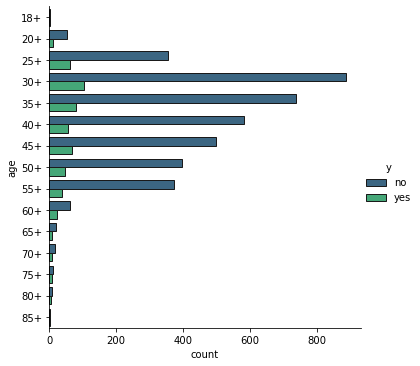

In [15]:
sns.catplot(y="age", hue="y", kind="count",
            palette="viridis", edgecolor=".1",
            data=da, order=['18+','20+','25+','30+','35+','40+','45+','50+','55+','60+','65+','70+','75+','80+','85+'])

<AxesSubplot:xlabel='count', ylabel='job'>

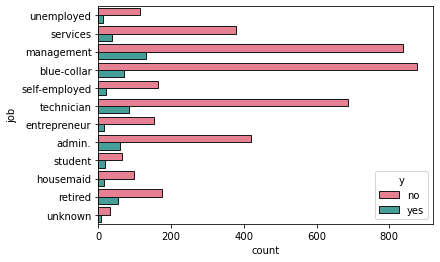

In [16]:
sns.countplot(y="job", hue="y", palette="husl", edgecolor=".1",data=df)

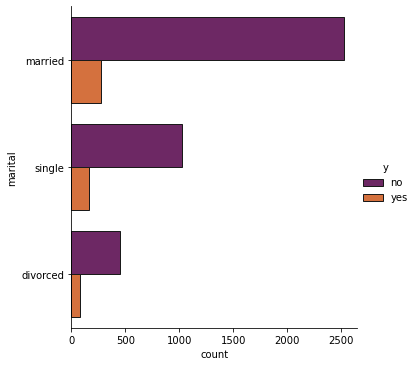

In [17]:
sns.catplot(y="marital", hue="y", kind="count",palette="inferno", edgecolor=".1",data=df)

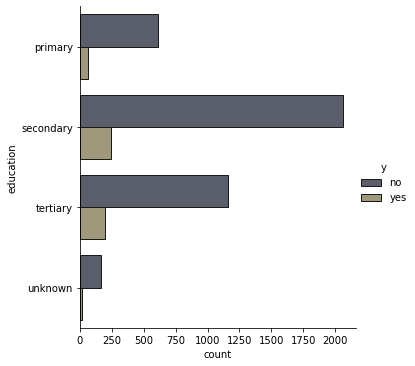

In [18]:
sns.catplot(y="education", hue="y", kind="count",palette="cividis", edgecolor=".1",data=df)

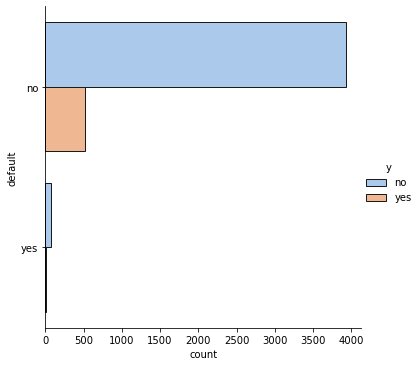

In [19]:
sns.catplot(y="default", hue="y", kind="count",palette="pastel", edgecolor=".1",data=df)
# colour is my target variable 
# y axis is my default

In [20]:
print('Highest Amount In Bank Books is ',df['balance'].max(),"Euro's")
print('Lowest Amount In The Books Of Bank Is',df['balance'].min(),"Euro's")

Highest Amount In Bank Books is  71188 Euro's
Lowest Amount In The Books Of Bank Is -3313 Euro's


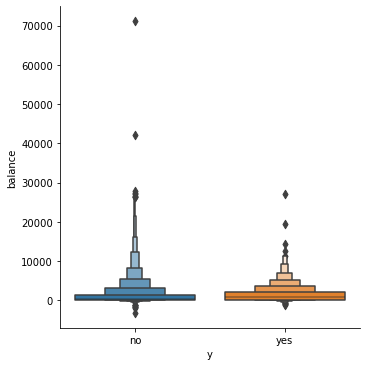

In [21]:
sns.catplot(x='y',y='balance',kind='boxen',data=df)

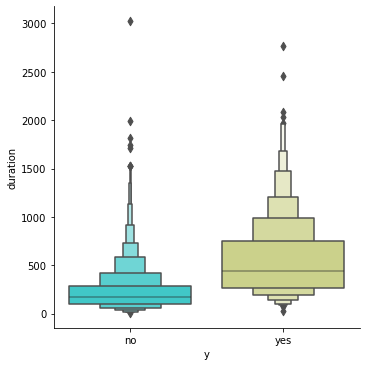

In [22]:
sns.catplot(x='y',y='duration',kind='boxen',data=df,palette='rainbow')
# duration is so long for a campaign about to 10 years as we can clearly c here if 
# the campaign is going for a long duration people are showing some interest 
# but as compair its very less  

In [23]:
df['campaign'].unique()

array([ 1,  4,  2,  5,  3,  6, 18, 10,  9,  7, 12, 14, 13, 24, 11,  8, 29,
       32, 16, 22, 15, 30, 25, 21, 17, 19, 23, 20, 50, 28, 31, 44],
      dtype=int64)

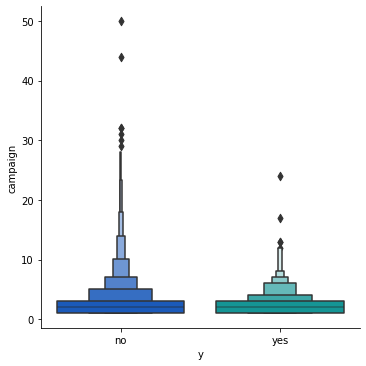

In [24]:
sns.catplot(x='y',y='campaign',kind='boxen',data=df,palette='winter')
# here the persons to whom we are showing the campaign ads 

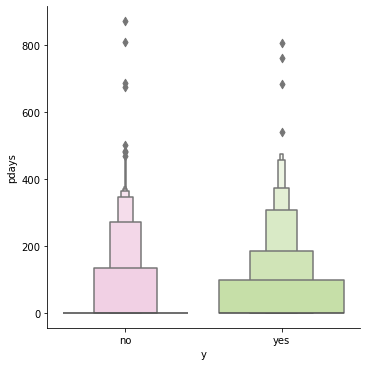

In [25]:
sns.catplot(x='y',y='pdays',kind='boxen',data=df,palette='PiYG')

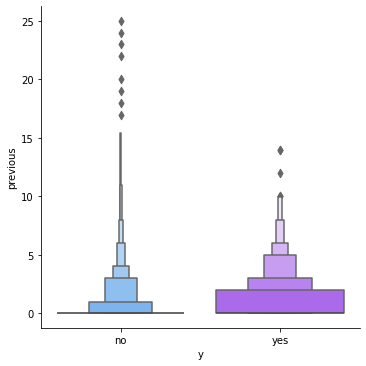

In [26]:
sns.catplot(x='y',y='previous',kind='boxen',data=df,palette='cool')
# number of contacts performed before ad campaign

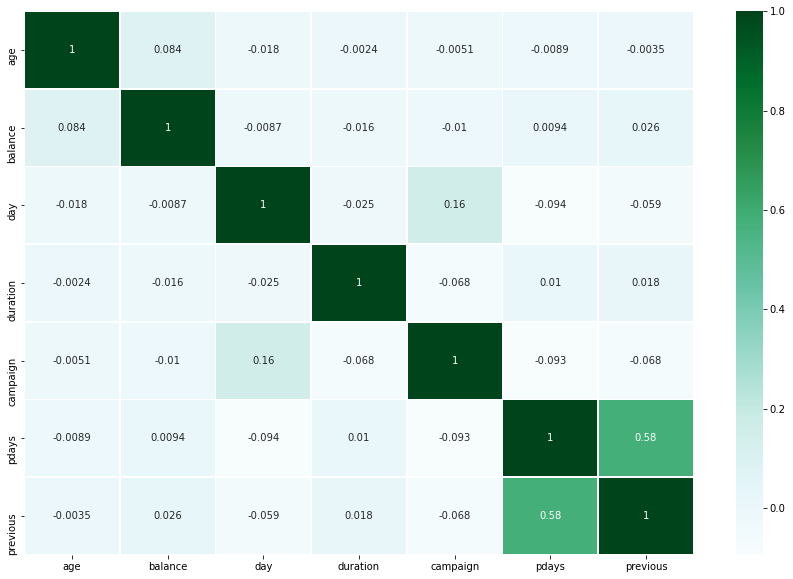

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth='0.5',cmap='BuGn')
plt.show()

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [29]:
def ft(row):
    if row['y']=='yes':
        return 1
    else:
        return 0
df['Target']=df.apply(ft,axis=1)

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [31]:
df['Target'].unique()

array([0, 1], dtype=int64)

In [32]:
df.drop(['y'],axis=1,inplace=True)

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [35]:
df1=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration',
        'campaign', 'pdays','previous', 'poutcome', 'Target']]

In [36]:
job=df1[['job']]
job=pd.get_dummies(job,drop_first=True)
job.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [37]:
marital=df1[['marital']]
marital=pd.get_dummies(marital,drop_first=True)
marital.head()

,marital_married,marital_single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [38]:
education=df1[['education']]
education=pd.get_dummies(education,drop_first=True)
education.head()

,education_secondary,education_tertiary,education_unknown
0,0,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [39]:
default=df1[['default']]
default=pd.get_dummies(default,drop_first=True)
default.head()

,default_yes
0,0
1,0
2,0
3,0
4,0


In [40]:
housing=df1[['housing']]
housing=pd.get_dummies(housing,drop_first=True)
housing.head()

,housing_yes
0,0
1,1
2,1
3,1
4,1


In [41]:
loan=df1[['loan']]
loan=pd.get_dummies(loan,drop_first=True)
loan.head()

,loan_yes
0,0
1,1
2,0
3,1
4,0


In [42]:
contact=df1[['contact']]
contact=pd.get_dummies(contact,drop_first=True)
contact.head()

,contact_telephone,contact_unknown
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1


In [43]:
month=df1[['month']]
month=pd.get_dummies(month,drop_first=True)
month.head()

,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [44]:
poutcome=df1[['poutcome']]
poutcome=pd.get_dummies(poutcome,drop_first=True)
poutcome.head()

,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,1


In [45]:
ds=pd.concat([df,job,marital,education,default,housing,loan,contact,month,poutcome],axis=1)

In [46]:
ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,0,1,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,0,1,0,0,0,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0,1,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1


In [47]:
ds.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis=1,inplace=True)

In [48]:
ds.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [49]:
ds.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [50]:
X=ds.drop('Target', axis=1)
Y=ds['Target']

Train_Test_Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# we are training 20% of the data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)

# Implementing ExtraTress Classifier & Logistic Regression

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [55]:
et=ExtraTreesClassifier()
lr=LogisticRegression()

In [56]:
et.fit(X_train,Y_train)

ExtraTreesClassifier()

In [57]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [58]:
# ExtraTreesClassifier train accuracy 
et.score(X_train,Y_train)

1.0

In [59]:
# LogisticRegression train accuracy
lr.score(X_train,Y_train)

0.8879977876106194

In [60]:
pred=et.predict(X_test)

In [61]:
pred=lr.predict(X_test)

In [62]:
# Extratrees classifier test accuracy 
et.score(X_test,Y_test)

0.8983425414364641

In [63]:
# Logistic Regression test accuracy
lr.score(X_test,Y_test)

0.8828729281767956

Now, Performing Feature Selection

In [64]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using RFE & VIF On the dataset for LogisticRegression

In [66]:
rfe = RFE(lr, 15)  #15 will show the top variables
rfe = rfe.fit(X_train, Y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['job_retired', 'marital_married', 'default_yes', 'loan_yes',
       'contact_unknown', 'month_dec', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [67]:
# Creating  dataframe with RFE selected variables

x_train_rfe = X_train[rfe_]

In [68]:
def build_model(X,Y):
    X = sm.add_constant(X) 
    #Ading constant
    lm = sm.OLS(Y,X).fit() 
    print(lm.summary()) #summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [69]:
x_train_new = build_model(x_train_rfe,Y_train)

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     34.87
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           1.07e-94
Time:                        19:03:06   Log-Likelihood:                -758.73
No. Observations:                3616   AIC:                             1549.
Df Residuals:                    3600   BIC:                             1649.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1612      0.012  

In [70]:
x_train_rfe

,job_retired,marital_married,default_yes,loan_yes,contact_unknown,month_dec,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success
4238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1715,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
431,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3256,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2550,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0
537,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1220,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [71]:
checkVIF(x_train_new)

,Features,VIF
0,const,5.66
11,month_may,2.20
5,contact_unknown,2.10
9,month_jun,2.01
8,month_jul,1.39
12,month_nov,1.22
7,month_jan,1.10
13,month_oct,1.06
14,poutcome_other,1.05
4,loan_yes,1.04


In [72]:
x_train_new = x_train_new.drop('const',axis=1)

In [73]:
checkVIF(x_train_new)

,Features,VIF
13,poutcome_other,1.08
0,job_retired,1.07
6,month_jan,1.06
14,poutcome_success,1.06
12,month_oct,1.04
2,default_yes,1.03
5,month_dec,1.02
9,month_mar,1.02
8,month_jun,0.82
11,month_nov,0.21


In [74]:
feats=list(x_train_new.columns)

In [75]:
#now  for selected features we have to form a model and check accuracy
lr_sel = LogisticRegression()
lr_sel.fit(X_train[feats],Y_train)

LogisticRegression()

In [76]:
predictions = lr.predict(X_test)
pred_selected=lr_sel.predict(X_test[feats])

In [77]:
from sklearn.metrics import accuracy_score
print('For all features')
print(accuracy_score(Y_test, predictions))
print('\nFor selected features')
print(accuracy_score(Y_test, pred_selected))

For all features
0.8828729281767956

For selected features
0.8972375690607735


After feature selection there is only 1 percent of increment in Logistic Regression.

# Implementing RandomForest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model = RandomForestClassifier(n_estimators=18)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=18)

In [79]:
model.score(X_train,Y_train)

0.9961283185840708

In [80]:
model.score(X_test,Y_test)

0.8950276243093923

We can clearly see that ExtraTreesClassifier Performing Well, as Training Accuracy is 1.0 and Testing Accuracy is 89% Approx.